# An Analysis of the *palmerpenguins* Dataset

<!-- Use left, center or right. Font size doesn't seem to change.-->
<p>
<div style="text-align: center;">
    <img src="img/palmerpenguins.png" width="10%">
</div>
<div style="text-align: center" font = 7> Artwork by @allison_horst </div>  
</p>  

****

| Topic | Details |
|---------|-------------|
| **Module:**  | 8634 - Principles of Data Analytics  |
| **Lecturer:**  | Ian McLoughlin  | 
| **Course:**  | Diploma in Science in Computing (Data Analytics)  |
| **Year/Semester:**  | Year 1/Semester 1  |
| **Author:**  | David O'Connell  |
| **Student ID:**  | G00438912  |
| **Student Email:**  | G00438912@atu.ie  |  

## Overview
This notebook contains my analysis of the well-known *palmerpenguins* dataset.  
This dataset is available on [GitHub](https://allisonhorst.github.io/palmerpenguins/) and 
The purpose of this dataset is to 

"The goal of palmerpenguins is to provide a great dataset for data exploration & visualization as an alternative to iris" [g1].

"Both datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica." [g1].

The dataset includes a number of attributes 6 attributes 3 species of penguin and also the collection location. The species are:  
<a name="Penguin-Species"></a>
<p>
<div style="text-align: center" font=10 weight=bold> Figure 1 - Palmer Penguins species </div> 
<div style="text-align: center;">
    <img src="img/penguins.png" width="67%">
</div>
<div style="text-align: center" font = 7> Artwork by @allison_horst </div> 
</p>
***********  

**BUILD OUT AND ADD LINKS**
Data for the palmerpenguins dataset were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php
https://pal.lternet.edu/
https://pal.lternet.edu/
https://lternet.edu/




## Packages Used
<a name="Packages-Used"></a>
| Software | Version | Summary|
|---------|-------------|---------|
|[Python](https://www.python.org/) | 3.11.7 | Python is a programming language that lets you work more quickly and integrate your systems more effectively.  |
|[NumPy](https://numpy.org/) |1.26.4 | NumPy is an open source project that enables numerical computing with Python.  |
|[Pandas](https://pandas.pydata.org/) |2.1.4 | Pandas is a software library written for the Python programming language for data manipulation and analysis.  |
|[Matplotlib](https://matplotlib.org/) | 3.8.0 | Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. |  
|[Seaborn](https://seaborn.pydata.org/) | 0.13.2 | Seaborn is a Python data visualization library based on matplotlib. |  
|[VS Code](https://code.visualstudio.com/) | 1.88.0 | Visual Studio Code is a lightweight but powerful source code editor which runs on your desktop. |  
|[Jupyter](https://jupyter.org/)| v2024.3.1 | VS Code extension for Jupyter Notebook support, interactive programming and computing that supports Intellisense, debugging and more. |  

We use pandas for the DataFrame data structure.

It allows us to investigate CSV files, amongst other features.

### Imports
This project makes use of the following packages for analysis and visualization of the *palmerpenguins* dataset. See the table in the [Packages Used](#Packages-Used) section above for summaries and links.

In [160]:
# Data frames.
# Importing pandas as pd means we can use "pd." instead of "panda."

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load the Data  
The *palmerpenguins* dataset is loaded from the link below. This version has undergone some reshaping to render it more suitable for use with Python (for example, 'NA's have been removed), as the dataset available from the [*palmerpenguins* GitHub repository](https://allisonhorst.github.io/palmerpenguins/) was originally targeted for use with the R programming language.

In [3]:
# Load the penguins dataset.
# PANDAS will load the file into memory and parse it - deals with headers, commas, newlines, etc.

penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Inspect the Data  
The data is now loaded into a Pandas dataframe and we can proceed to inspect it.  
Dataframes are a fundamental data structure in Pandas and are analagous to excel datasheets. Pandas provides native methods to query and manipulate dataframes.  
  
Firstly, confirm the size of the dataset - *pandas.Dataframe.shape* returns the number of rows and columns as a tuple.

In [348]:
# How many rows and columns.
penguins.shape

(344, 7)

We now use *pandas.Dataframe.head* and *pandas.Dataframe.tail* to inspect the first and last *n* rows of data respectively. If *n* is not provided, the default value is 5. One benefit of using *tail*, as well as *head*, is that it confirms that the full dataset has been read in. In this case, we can see that there are 344 rows and 7 columns, as expected.

In [349]:
# Retrieve the first 3 rows.
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [350]:
# Retrieve the last 3 rows.
penguins.tail(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


Pandas also provides *loc* and *iloc* methods to inspect specific rows by label or position respectively.

In [364]:
penguins.loc[0:2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


Check how many rows are missing values.

In [470]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

2 rows missing data for each measured attribute. This should not be statistically very significant.  
11 rows are missing the sex of the penguin, which may be more significant if attempting to separate out data by sex. As a next step, we will look at the number of penguins of each sex.

In [370]:
# Count the number of penguins of each sex.
penguins['sex'].value_counts(dropna=False)

sex
MALE      168
FEMALE    165
NaN        11
Name: count, dtype: int64

We will now plot the number of penguins of each sex,  including the missing values as 'NONE' for completeness.  
Reference [c5] was useful for this.

Text(0, 0.5, 'Count')

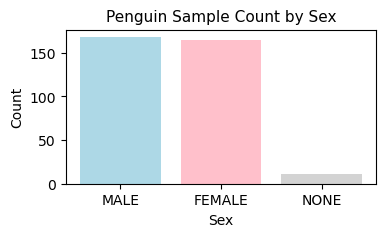

In [387]:
# Make a copy of the original dataframe as we do not want to overwrite the original data.
penguins2 = penguins.copy()
# Fill the missing values for sex with 'NONE'.
penguins2['sex'] = penguins2['sex'].fillna('NONE')
counts2 = penguins2['sex'].value_counts(dropna=False)
# Plot the number of each sex.
xb = ['MALE', 'FEMALE', 'NONE']
yb = [counts2['MALE'], counts2['FEMALE'], counts2['NONE']]
# Set the size, colours, labels and title of the plot.
fig=plt.figure(figsize=(4,2))
plt.bar(xb, yb, color=['lightblue','pink','lightgrey'])
plt.title("Penguin Sample Count by Sex", fontsize=11)
plt.xlabel("Sex", fontsize=10)
plt.ylabel("Count", fontsize=10)

Next, we will count the number of penguins that was sampled from each species.

In [471]:
# Count the number of penguins of each species.
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Plot the number of each species for which samples have been gathered. Keep the same colours as used for the background for each species in [Figure 1](#Penguin-Species) above. Reference [c4] was useful for this.

Text(0, 0.5, 'Species')

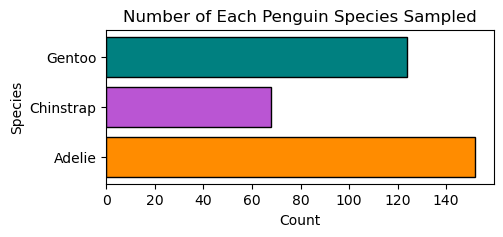

In [472]:
# Plot the count of each species
species_counts = penguins['species'].value_counts()
penguin_species=np.unique(penguins['species'])

# We will use this to set the colour
colourtest = [{'spec':'Adelie','col':'darkorange'},
              {'spec':'Chinstrap','col':'mediumorchid'},
              {'spec':'Gentoo','col':'teal'}]
index=0
# This list will hold the count of each penguin species
penguin_counts=[]
# This list will hold the bar colours
penguin_col=[]

# Build the list of counts
for p in penguin_species:
    penguin_counts.append(int(species_counts[p]))

    # Set the correct bar colours - I am sure there is a simpler way to do this
    col_index = 0
    for c in colourtest:
        if colourtest[col_index]['spec']==p:
            penguin_col.append(colourtest[col_index]['col'])
            break
        else:
            col_index+=1

    index+=1

# Draw the plot - used W3Schools and geeksforgeeks to get help with these
# Set the size of the plot
fig=plt.figure(figsize=(5,2))
plt.barh(penguin_species, penguin_counts, color=penguin_col, edgecolor='black')
plt.title("Number of Each Penguin Species Sampled", fontsize=12)
plt.xlabel("Count", fontsize=10)
plt.ylabel("Species", fontsize=10)
#plt.pie(penguin_counts, labels=penguin_species,colors=penguin_col, autopct='%2.1f')
#plt.legend()

We can see that the largest number of samples was taken for the Adelie species at 152; followed by Gentoo at 124. The smallest number of samples was taken for Chinstrap, at 68.

We will now look at the locations those samples were taken for each species.

In [271]:
# Show the distribution by island
location = pd.DataFrame(penguins.groupby(["island","species"])["island"].count())
location.rename(columns={"island":"sum"})
location
#print(location['island'])

island
island    species          
Biscoe    Adelie         44
          Gentoo        124
Dream     Adelie         56
          Chinstrap      68
Torgersen Adelie         52

We will  plot the sample location distributions per species for easier visualization.

Text(0.5, 0.98, 'Sample Locations for each Penguin Species')

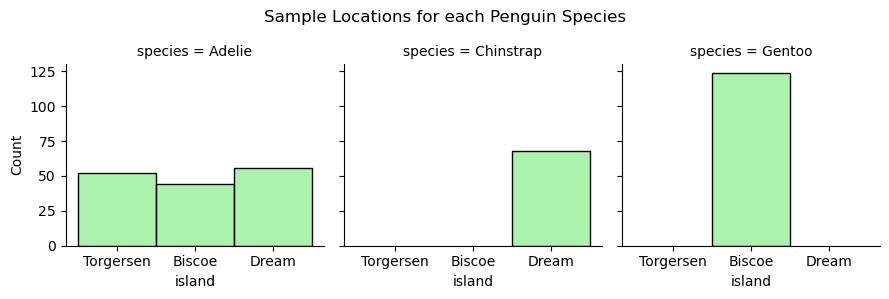

In [421]:
# Create a grid plot with the species as columns
x1 = sns.FacetGrid(penguins, col="species")
# Plot the locations that each species was sampled at
x1.map(sns.histplot, "island", color='lightgreen')
x1.figure.subplots_adjust(top = 0.8)
x1.figure.suptitle("Sample Locations for each Penguin Species", fontsize=12)


We can see that only the Adelie species was sampled across more than one island; Gentoo and Chinstrap were each sampled on only 1 island. It may be possible that this gives rise to a greater spread in the data for Adelie. We will revisit this later on. 

## Analyze the Data

### Summary Statistics  
We can now start to look at the data in more depth. Start with a review of the summary statistics that Pandas generates.  

In [12]:
# Describe the data set. Takes the numerical variables.

penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### Observations
These summary statistics are likely not very useful as they hide the differences between species.
It is more beneficial to generate, review and compare the statistics for each species.

### Summary Stastics by Species

In [467]:
# Slice the dataset into species
adelie = penguins[penguins['species']=="Adelie"]
chinstrap = penguins[penguins['species']=="Chinstrap"]
gentoo = penguins[penguins['species']=="Gentoo"]

print('Adelie', adelie.shape, ' | ', end=' ')       # Should be 152 rows x 7 columns
print('Chinstrap', chinstrap.shape, ' | ', end=' ') # Should be 68 rows x 7 columns
print('Gentoo', gentoo.shape)                       # Should be 124 rows x 7 columns

Adelie (152, 7)  |  Chinstrap (68, 7)  |  Gentoo (124, 7)


Plot the attributes, with each plot including a single attribute across all species. This will provide a view as to how toose attributes overlap across the species. 

Text(0, 0.5, '')

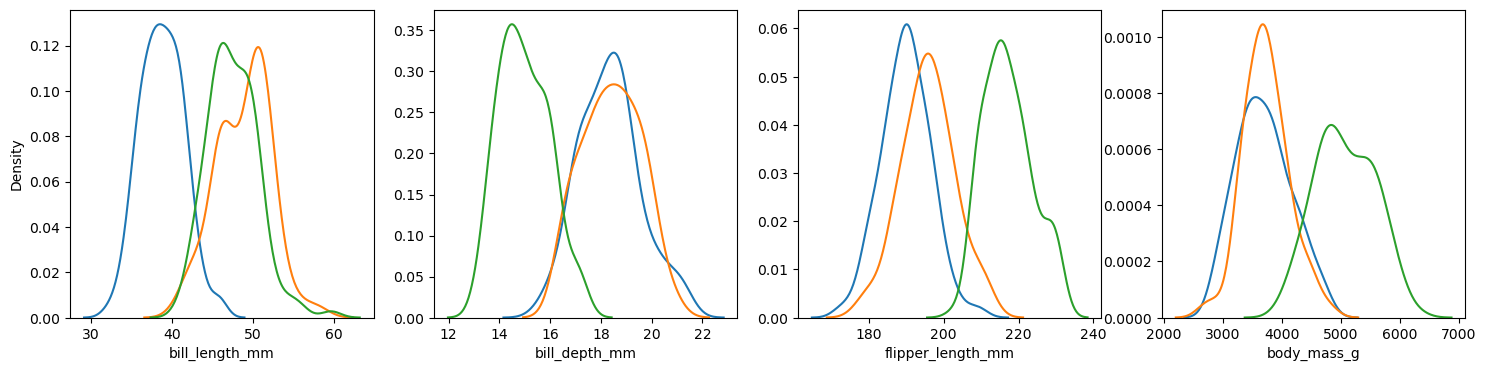

In [468]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,4))

# Draw 4 sub-plots for penguins overall, and for each species - set the titles accordingly.
# Set the same min and max so the colour bar will be common, and disable it on 3 plots.
# Reference [c2].
sns.kdeplot(adelie['bill_length_mm'], ax=axes[0])
sns.kdeplot(chinstrap['bill_length_mm'], ax=axes[0])
sns.kdeplot(gentoo['bill_length_mm'], ax=axes[0])

sns.kdeplot(adelie['bill_depth_mm'], ax=axes[1])
sns.kdeplot(chinstrap['bill_depth_mm'], ax=axes[1])
sns.kdeplot(gentoo['bill_depth_mm'], ax=axes[1])

sns.kdeplot(adelie['flipper_length_mm'], ax=axes[2])
sns.kdeplot(chinstrap['flipper_length_mm'], ax=axes[2])
sns.kdeplot(gentoo['flipper_length_mm'], ax=axes[2])

sns.kdeplot(adelie['body_mass_g'], ax=axes[3])
sns.kdeplot(chinstrap['body_mass_g'], ax=axes[3])
sns.kdeplot(gentoo['body_mass_g'], ax=axes[3])

axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')

#### Observations

Check how many rows are missing values.

Text(0.5, 0.98, 'Scatterplots of Penguin Attribute Pairs, Colour Coded by Species')

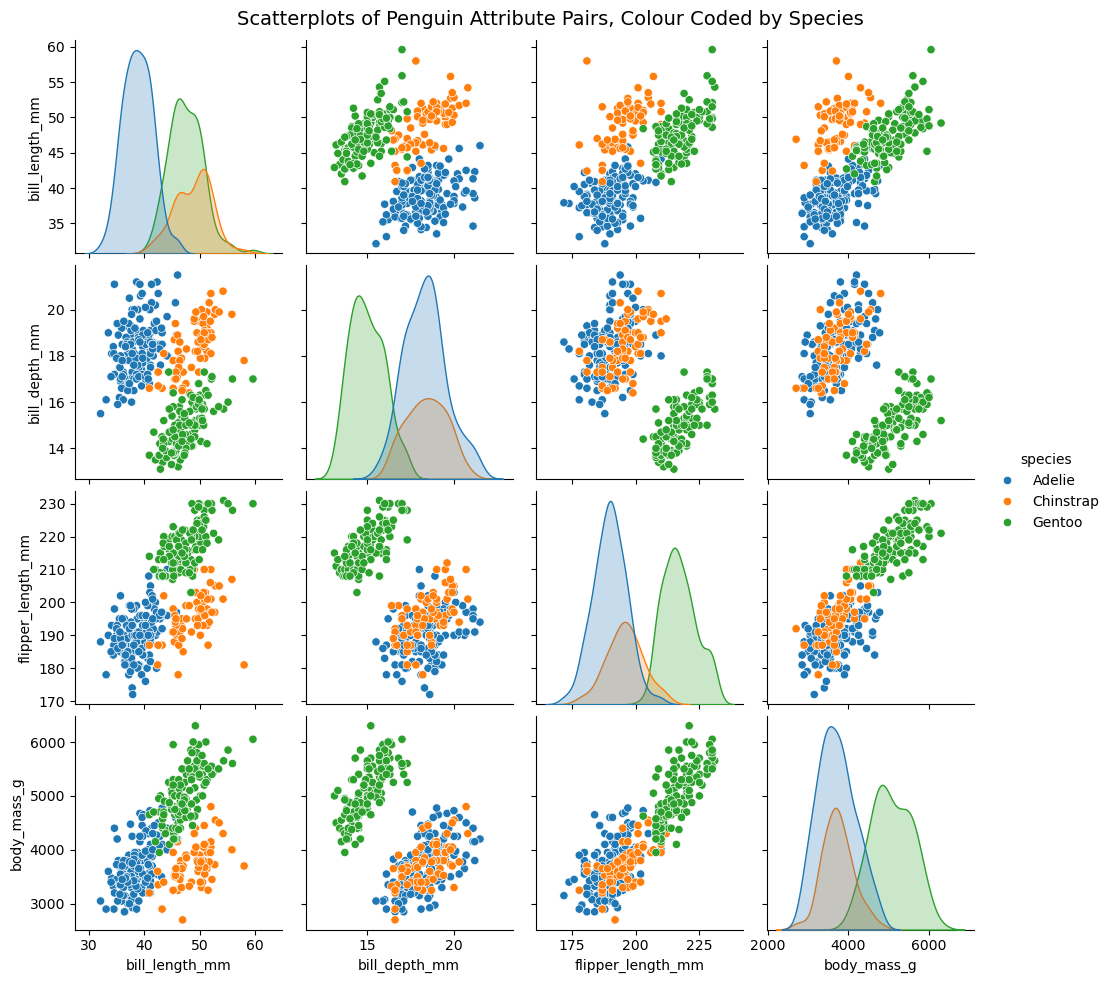

In [410]:
# Use Seaborn to draw the scatter plots
ax=sns.pairplot(penguins,hue="species", corner=False)
ax.figure.subplots_adjust(top = 0.95)
ax.figure.suptitle("Scatterplots of Penguin Attribute Pairs, Colour Coded by Species", fontsize=14)

In [16]:
# Set numeric_only = True to ignore any non-numeric columns. NaN values are automatically excluded.
# Ref [c1].
corr = penguins.corr(method='pearson', numeric_only=True)
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [ ]:
adelie.corr(method='pearson', numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.391492,0.325785,0.548866
bill_depth_mm,0.391492,1.000000,0.307620,0.576138
flipper_length_mm,0.325785,0.307620,1.000000,0.468202
body_mass_g,0.548866,0.576138,0.468202,1.000000


In [323]:
# Draw a correlation heatmap - annotate each cell with the correlation value
#corr1 = adelie.corr(method='pearson', numeric_only=True)
#corr2 = chinstrap.corr(method='pearson', numeric_only=True)
#corr3 = gentoo.corr(method='pearson', numeric_only=True)

corr1 = penguins.loc[penguins['species']=="Adelie"].corr(method='pearson', numeric_only=True)
corr2 = penguins.loc[penguins['species']=="Chinstrap"].corr(method='pearson', numeric_only=True)
corr3 = penguins.loc[penguins['species']=="Gentoo"].corr(method='pearson', numeric_only=True)

Text(0.5, 0.98, 'Pairwise Attribute Correlation Heatmaps, Overall and per Species')

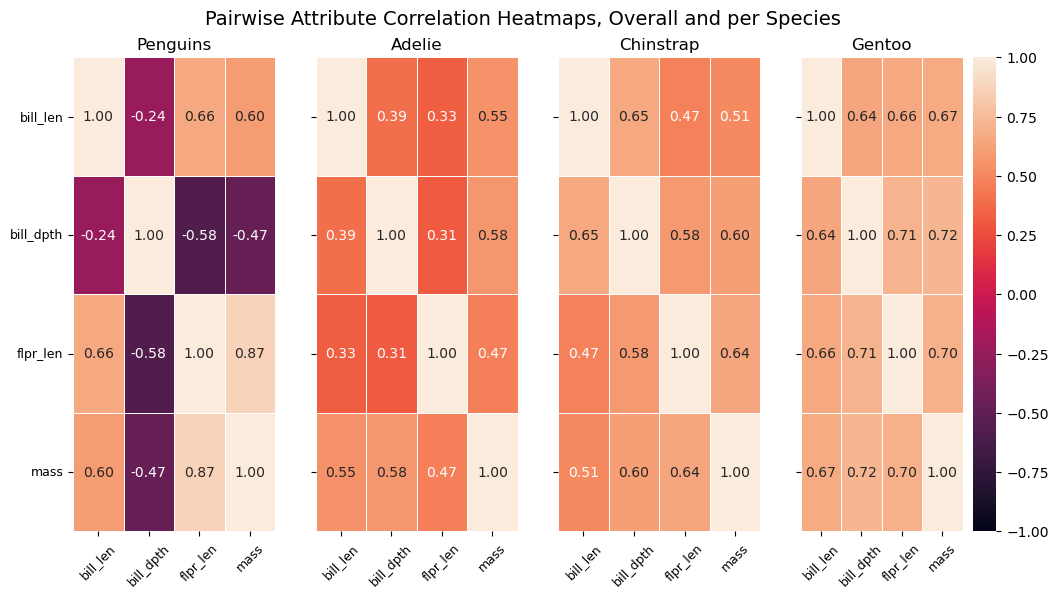

In [412]:
# Create the plot framework for the invididual heatmaps. The y-axis will be shared.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,6), sharey='row')

# Draw 4 sub-plots for penguins overall, and for each species - set the titles accordingly.
# Set the same min and max so the colour bar will be common, and disable it on 3 plots.
# Reference [c2].

sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.5, ax=axes[0], vmin=-1, vmax=1, cbar=False)
axes[0].set_title("Penguins")

sns.heatmap(corr1, annot=True, fmt=".2f", linewidth=.5, ax=axes[1], vmin=-1, vmax=1, cbar=False)
axes[1].set_title("Adelie")

sns.heatmap(corr2, annot=True, fmt=".2f", linewidth=.5, ax=axes[2], vmin=-1, vmax=1, cbar=False)
axes[2].set_title("Chinstrap")

sns.heatmap(corr3, annot=True, fmt=".2f", linewidth=.5, ax=axes[3], vmin=-1, vmax=1, cbar=True)
axes[3].set_title("Gentoo")

for i in range(4):
    axes[i].set_xticks([0.5,1.5,2.5,3.5], labels=['bill_len', 'bill_dpth', 'flpr_len', 'mass'])
    axes[i].xaxis.set_tick_params(rotation=45, labelsize=9)
    axes[i].set_yticks([0.5,1.5,2.5,3.5], labels=['bill_len', 'bill_dpth', 'flpr_len', 'mass'])
    axes[i].yaxis.set_tick_params(rotation=0, labelsize=9)

fig.subplots_adjust(top = 0.9)
fig.suptitle("Pairwise Attribute Correlation Heatmaps, Overall and per Species", fontsize=14)
    

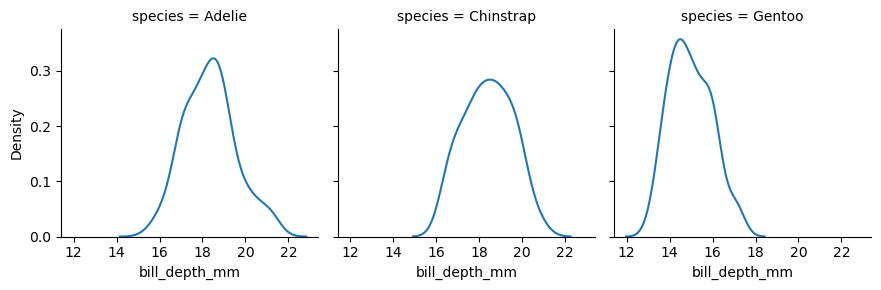

In [ ]:
g = sns.FacetGrid(penguins, col="species")
#g.map(sns.histplot, "bill_depth_mm")
g.map(sns.kdeplot, "bill_depth_mm")

The *palmerpenguins dataset* is distributed across male and female penguins for each species.


Text(0.5, 0.98, 'Scatterplots of Adelie attribute pairs, colour coded by sex')

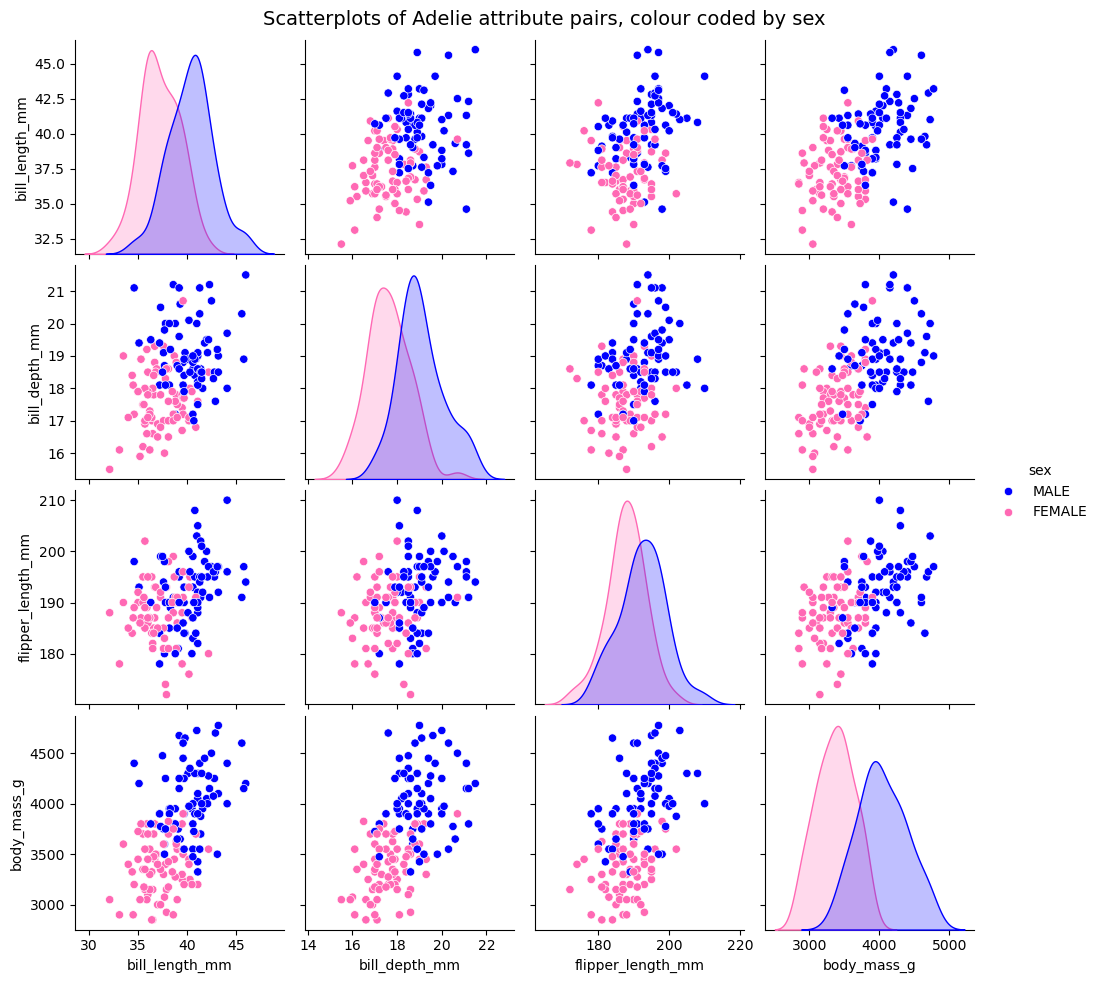

In [335]:
ax1=sns.pairplot(adelie,hue="sex", palette=['blue','hotpink'],corner=False)
ax1.figure.subplots_adjust(top = 0.95)
ax1.figure.suptitle("Scatterplots of Adelie Attribute Pairs, Colour Coded by Sex", fontsize=14)

Text(0.5, 0.98, 'Scatterplots of Chinstrap Attribute Pairs, Colour Coded by Sex')

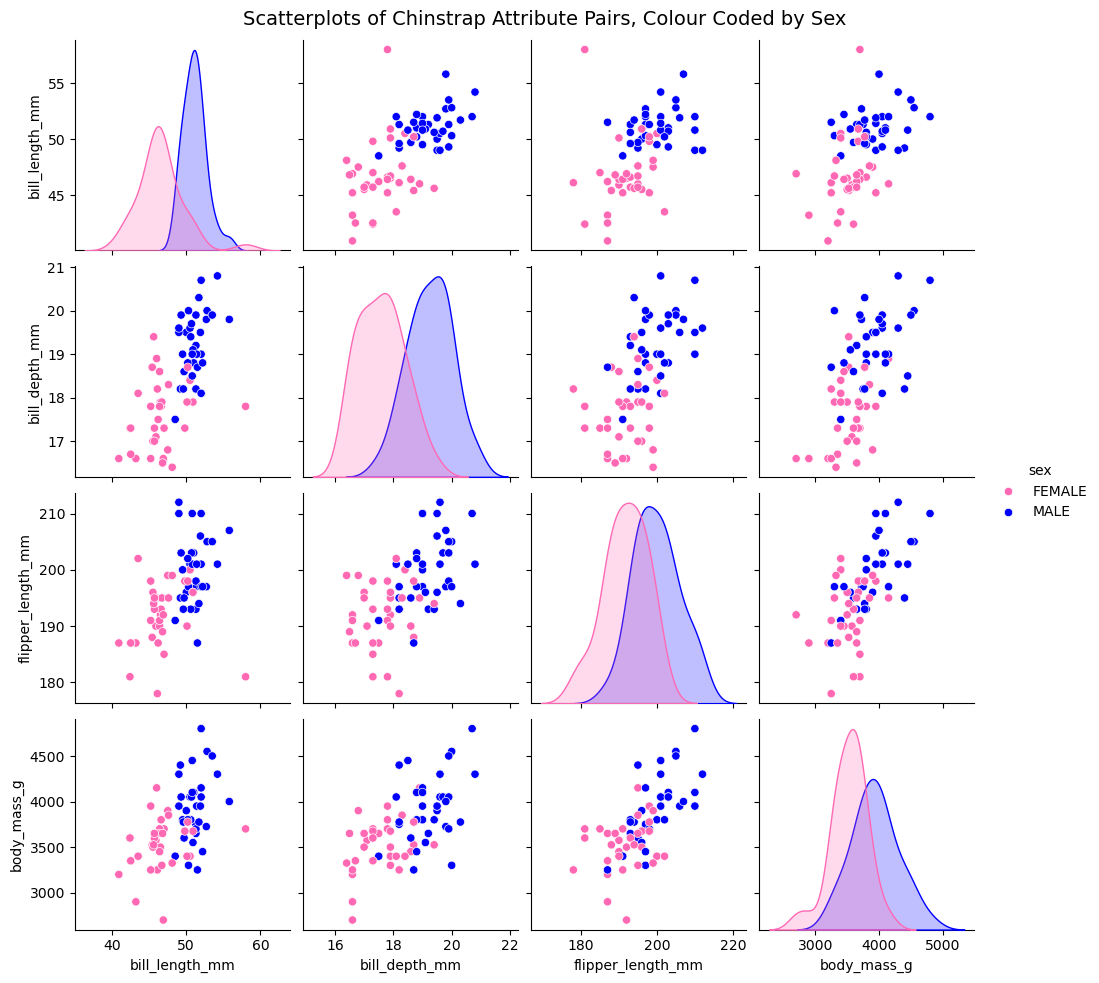

In [413]:
ax2=sns.pairplot(chinstrap,hue="sex", palette=['hotpink','blue'], corner=False)
ax2.figure.subplots_adjust(top = 0.95)
ax2.figure.suptitle("Scatterplots of Chinstrap Attribute Pairs, Colour Coded by Sex", fontsize=14)

Text(0.5, 0.98, 'Scatterplots of Gentoo Attribute Pairs, Colour Coded by Sex')

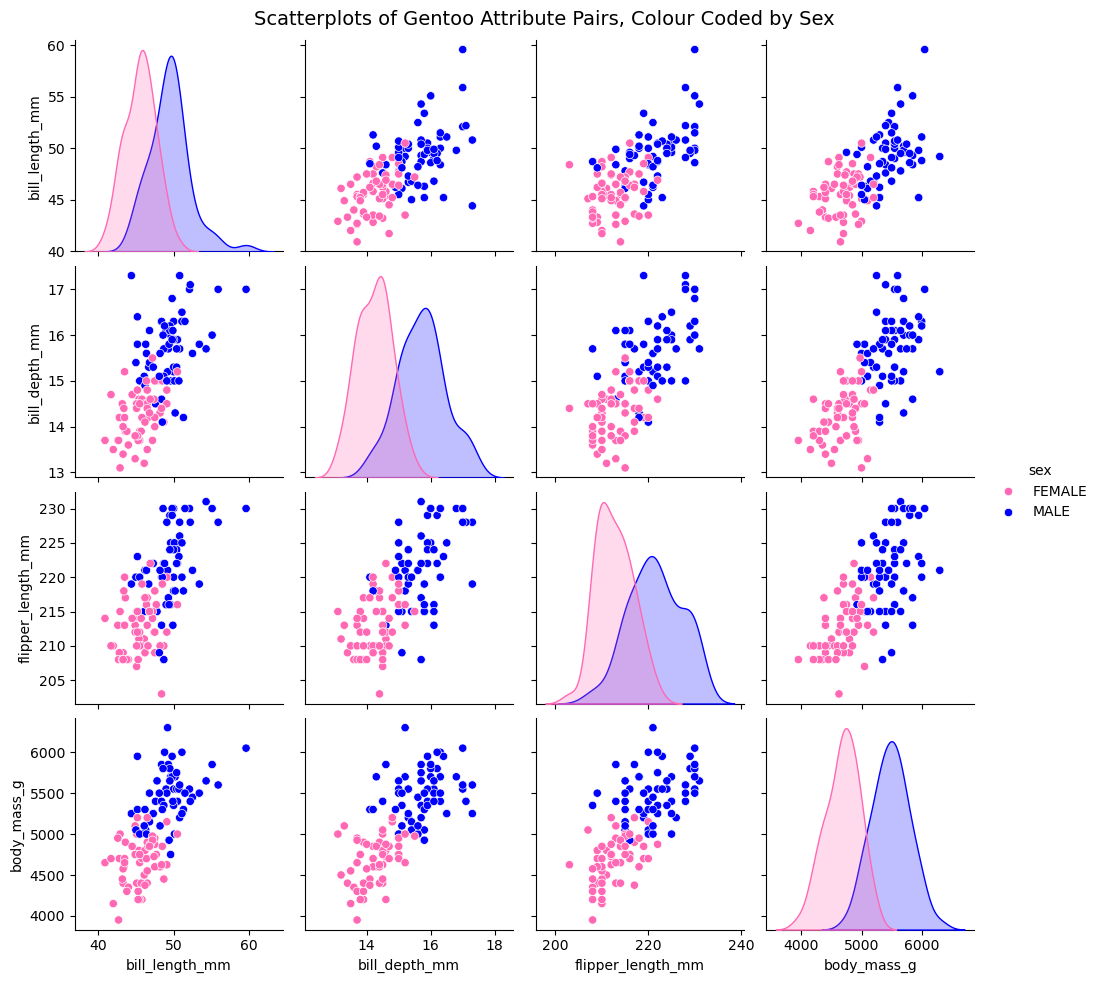

In [414]:
ax3=sns.pairplot(gentoo,hue="sex", palette=['hotpink','blue'], corner=False)
ax3.figure.subplots_adjust(top = 0.95)
ax3.figure.suptitle("Scatterplots of Gentoo Attribute Pairs, Colour Coded by Sex", fontsize=14)

## General References
These are referred to as [g1], [g2], etc throughout the notebook.
1. [GitHub repository for palmerpenguins](https://allisonhorst.github.io/palmerpenguins/)

## Code References
1. [Pandas correlation](https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/)
2. [Colour maps, colour bars](https://stackoverflow.com/questions/13784201/how-to-have-one-colorbar-for-all-subplots?noredirect=1&lq=1)
3. [Penguins plots](https://towardsdatascience.com/plotly-pandas-for-the-palmer-penguins-f5cdab3c16c8) - used to figure out how to tabulate the penguin species by island.
4. [Plotting bar and pie charts](https://www.w3schools.com/python/matplotlib_bars.asp) - useful tutorials on W3Schools, used this site to help with bar and pie charts.
5. [Replacing NaN with another value](https://datascience.stackexchange.com/questions/97087/plot-nans-as-a-category-seaborn-countplot) - this helped with creating a plot of the counts of the sex of the penguins, including a separate bar for the missing values.

## Tables

***

|Species   |Bill Length (mm)|Body Mass (g)| 
|----------|---------------:|------------:|
|Adelie    |             8.8|         3701|
|Chinstrap |            48.8|         3733|
|Gentoo    |            47.5|         5076|


## Math

***

$f(x) = x^2$

$\sum_{i=0}^{n-1} i$

$\bar{x} = \frac{\sum_{i=0}^{n-1} x_i}{n}$

***
### End